# Análisis y Modelado Predictivo

En este notebook, se recopilarán y unirán todos los archivos CSV previamente generados para realizar un análisis completo de los datos. Posteriormente, se desarrollará un modelo predictivo utilizando la información consolidada.

In [31]:
!pip install pyodbc

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [44]:
import pyodbc
import pandas as pd
import os
from dotenv import load_dotenv
# Cargar variables de entorno desde archivo .env si existe
load_dotenv()

# Obtener las credenciales desde las variables de entorno
server = os.getenv('DB_SERVER')
username = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')
database = os.getenv('DB_DATABASE')

# Usamos autenticación interactiva con cuenta Microsoft
conn_str = (
    f'DRIVER={{ODBC Driver 18 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password};'
    'Encrypt=yes;TrustServerCertificate=yes;Connection Timeout=30;'
)

In [45]:
# Consulta para obtener los datos sin la cabecera por defecto
query = """
SELECT * FROM dbo.booking
"""
try:
    # Establecer conexión
    conn = pyodbc.connect(conn_str)
    # Leer datos en un DataFrame de pandas
    df_booking = pd.read_sql(query, conn)
    # Mostrar las primeras filas del DataFrame
    df_booking.columns = df_booking.iloc[0]
    df_booking = df_booking.drop(df_booking.index[0]) 
    print(df_booking.head())
except pyodbc.Error as e:
    print("Error al conectar a la base de datos:", e)
finally:
    # Cerrar la conexión
    if 'conn' in locals():
        conn.close()
        print("Conexión cerrada.")
    else:
        print("No se estableció conexión.")
  

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_7912\3611720716.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_booking = pd.read_sql(query, conn)


0                              hotel cancelado régimen canal_distribución  \
1  Eurostars Hotel de La Reconquista         0      BB             Direct   
2                    Gran Hotel Bali         0      BB          Corporate   
3                    Gran Hotel Bali         0      BB              TA/TO   
4  Eurostars Hotel de La Reconquista         0      BB              TA/TO   
5                    Gran Hotel Bali         0      BB             Direct   

0  tipo_cliente cliente_recurrente reservas_previas_no_canceladas adultos  \
1         Otras                  0                              0       1   
2  Tercera Edad                  0                              0       1   
3        Pareja                  0                              0       2   
4  Tercera Edad                  0                              0       2   
5        Pareja                  0                              0       2   

0 niños hombres  ... edad_51-65 edad_65+ nacionalidad_húesped  \
1     0  

In [46]:
# Consulta para obtener los datos sin la cabecera por defecto
query = """
SELECT * FROM dbo.campaing
"""
try:
    # Establecer conexión
    conn = pyodbc.connect(conn_str)
    # Leer datos en un DataFrame de pandas
    df_campaing = pd.read_sql(query, conn)
    # Mostrar las primeras filas del DataFrame
    df_campaing.columns = df_campaing.iloc[0]
    df_campaing = df_campaing.drop(df_campaing.index[0]) 
    print(df_campaing.head())
except pyodbc.Error as e:
    print("Error al conectar a la base de datos:", e)
finally:
    # Cerrar la conexión
    if 'conn' in locals():
        conn.close()
        print("Conexión cerrada.")
    else:
        print("No se estableció conexión.")

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_7912\126096131.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_campaing = pd.read_sql(query, conn)


0                                             nombre lanzamiento_inicio  \
1     parador de cádiz campaña 2019 - 1 semana santa         2019-02-08   
2     parador de cádiz campaña 2019 - 2 semana santa         2019-03-04   
3  eurostars hotel de la reconquista campaña 2019...         2019-03-01   
4  eurostars hotel de la reconquista campaña 2019...         2019-11-02   
5            gran hotel bali campaña 2019 - 1 verano         2019-06-13   

0 lanzamiento_fin fecha_inicio   fecha_fin publico_objetivo    region  \
1      2019-03-01   2019-04-05  2019-04-20          parejas     cádiz   
2      2019-03-19   2019-04-09  2019-04-19         familias     cádiz   
3      2019-03-27   2019-04-12  2019-04-20          jóvenes  asturias   
4      2019-11-25   2019-12-26  2019-12-31          jóvenes  asturias   
5      2019-07-07   2019-07-24  2019-08-19     tercera edad  benidorm   

0                              hotel  
1                   parador de cádiz  
2                   parador de c

In [47]:
# Consulta para obtener los datos sin la cabecera por defecto
query = """
SELECT * FROM dbo.review
"""
try:
    # Establecer conexión
    conn = pyodbc.connect(conn_str)
    # Leer datos en un DataFrame de pandas
    df_review = pd.read_sql(query, conn)
    # Mostrar las primeras filas del DataFrame
    df_review.columns = df_review.iloc[0]
    df_review = df_review.drop(df_review.index[0]) 
    print(df_review.head())
except pyodbc.Error as e:
    print("Error al conectar a la base de datos:", e)
finally:
    # Cerrar la conexión
    if 'conn' in locals():
        conn.close()
        print("Conexión cerrada.")
    else:
        print("No se estableció conexión.")

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_7912\2953871945.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_review = pd.read_sql(query, conn)


0                                               text sentiment
1  pleasant 10 min walk along the sea front to th...  positive
2  really lovely hotel stayed on the very top flo...  positive
3  ett mycket bra hotell det som drog ner betyget...  positive
4  we stayed here for four nights in october the ...  positive
5  we loved staying on the island of lido you nee...  positive
Conexión cerrada.


# HOTEL: Parador de Cadiz
- Fracionamos las reseñas en base a la cantidad de reservas de cada hotel


In [68]:
# Reseñas del Hotel: Parador de Cadiz
df_hotel_cadiz = df_hotel[df_hotel['hotel'].str.lower() == 'parador de cádiz']
total_booking = len(df_hotel_cadiz)

# Del total de reservas, coger la misma cantidad de reseñas, donde el 80% sean positivas y el 20% negativas, todas sacadas de df_reviews
df_reviews_positive = df_reviews[df_reviews['sentiment'] == 'positive']
df_reviews_negative = df_reviews[df_reviews['sentiment'] == 'negative']

total_positive = int(total_booking * 0.8)
total_negative = total_booking - total_positive
df_reviews_positive = df_reviews_positive.sample(n=total_positive, random_state=42)
df_reviews_negative = df_reviews_negative.sample(n=total_negative, random_state=42)

# Unir los DataFrames de Reviews
df_reviews_cadiz = pd.concat([df_reviews_positive, df_reviews_negative], ignore_index=True)

df_final = pd.concat([df_hotel_cadiz.reset_index(drop=True), df_reviews_cadiz.reset_index(drop=True)], axis=1)
df_final.head()


,hotel,cancelado,régimen,canal_distribución,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,niños,hombres,...,nacionalidad_húesped,público_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,días_reserva,plazas_aparcamiento,ubicación,text,sentiment
0,parador de cádiz,0,bb,ta/to,pareja,0,0,2,0,1,...,gbr,online ta,2020-02-12,2020-02-12,2020-02-14,2,0,cádiz,my wife and i are festival food vendors in the...,positive
1,parador de cádiz,1,bb,ta/to,pareja,0,0,2,0,1,...,prt,online ta,2024-01-07,2024-01-07,2024-01-11,4,0,cádiz,a nice clean hotel close to the highway the pl...,positive
2,parador de cádiz,0,hb,ta/to,pareja,0,0,2,0,1,...,prt,online ta,2020-06-27,2020-06-27,2020-07-01,4,0,cádiz,muy buena atencion gracias,positive
3,parador de cádiz,0,hb,ta/to,familia,0,0,2,1,1,...,esp,online ta,2020-09-03,2020-09-03,2020-09-07,4,0,cádiz,nice and clean would not hesitate to book agai...,positive
4,parador de cádiz,0,bb,ta/to,pareja,0,0,2,0,1,...,prt,online ta,2024-03-28,2024-03-28,2024-04-01,4,0,cádiz,todo bien,positive


C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_21160\4241928241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='sentiment', palette='Set2')


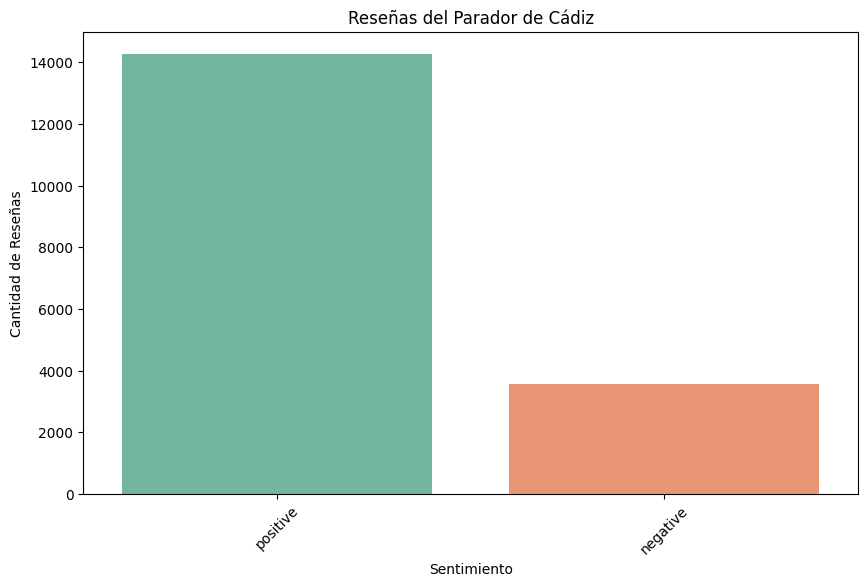

In [69]:
# Gráfica para ver las reseñas positivas y negativas de df_hotel_cadiz
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='sentiment', palette='Set2')
plt.title('Reseñas del Parador de Cádiz')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)
plt.show()

In [70]:
!pip install wordcloud nltk wordcloud googletrans==4.0.0-rc1 matplotlib pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Alumno_AI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [97]:
# Importar bibliotecas
import nltk
import pandas as pd
from nltk.corpus import stopwords
from googletrans import Translator
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar stopwords
nltk.download('stopwords')

# Definir stopwords español e inglés
stop_words = set(stopwords.words('spanish') + stopwords.words('english'))

# Agregar stopwords personalizadas
stop_words.update([
    # Español
    'hotel', 'bien', 'mal', 'bueno', 'buena', 'buen', 'malo', 'en', 'y', 'de', 'la', 'el', 'los', 'las',
    'un', 'una', 'con', 'por', 'para', 'que', 'se', 'del', 'al', 'lo', 'su', 'sus',
    'ir', 'está', 'están', 'estoy', 'estás', 'estamos', 'estáis', 'esté',
    'estén', 'ser', 'soy', 'eres', 'somos', 'sois', 'sea', 'sean', 'tener', 'tengo',
    'tienes', 'tenemos', 'tenéis', 'tenga', 'tengan', 'hacer', 'hago', 'haces',
    'hacemos', 'hacéis', 'haga', 'hagan', 'decir', 'digo', 'dices', 'decimos',
    'de', 'se', 'si', 'excelente', 'ir', 'va', 'van', 'vamos', 'fue', 'fueron',
    'servicio'
])

# Función para eliminar stopwords
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    filtered = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alumno_AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
!pip install deepl


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Alumno_AI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import deepl
 
auth_key = "YOUR_DEEPL_AUTH_KEY"
translator = deepl.Translator(auth_key)
 
# Función adaptada para traducir lista de palabras únicas usando DeepL
def traducir_palabras_unicas(palabras, idioma_destino='ES'):
    palabras_traducidas = {}
    try:
        traducciones = translator.translate_text(palabras, target_lang=idioma_destino)
        for palabra, traduccion in zip(palabras, traducciones):
            palabras_traducidas[palabra] = traduccion.text
    except Exception as e:
        print(f"Error de traducción: {e}")
        palabras_traducidas = {palabra: palabra for palabra in palabras}  # fallback original si falla traducción
    return palabras_traducidas

# Limpiar textos sin traducir aún y separar por sentimiento
textos_limpios_positivos = df_final[df_final['sentiment'] == 'positive']['text'].apply(remove_stopwords)
textos_limpios_negativos = df_final[df_final['sentiment'] == 'negative']['text'].apply(remove_stopwords)

# Sacar las palabras de las nubes de palabras
wordcloud_positiva = WordCloud().generate(" ".join(textos_limpios_positivos))
wordcloud_negativa = WordCloud().generate(" ".join(textos_limpios_negativos))
palabras_nube_positivas = set(wordcloud_positiva.words_.keys())
palabras_nube_negativas = set(wordcloud_negativa.words_.keys())
print(f'Palabras únicas en nube positiva: {len(palabras_nube_positivas)}')
print(f'Palabras únicas en nube negativa: {len(palabras_nube_negativas)}')

# Traducir palabras únicas
palabras_traducidas_positivas = traducir_palabras_unicas(palabras_nube_positivas, 'es')
palabras_traducidas_negativas = traducir_palabras_unicas(palabras_nube_negativas, 'es')

print(f'Palabras traducidas en nube positiva: {palabras_traducidas_positivas}')
print(f'Palabras traducidas en nube negativa: {palabras_traducidas_negativas}')


Palabras únicas en nube positiva: 200
Palabras únicas en nube negativa: 200
Palabras traducidas en nube positiva: {'people': 'gente', 'dos': 'dos', 'recepcin': 'recepcin', 'tambin': 'tambin', 'recomendado': 'recomendado', 'place stay': 'lugar estancia', 'personal amable': 'personal amable', 'stayed': 'permanezca en', 'atencin': 'atencin', 'always': 'siempre', 'ambiente': 'ambiente', 'perfect': 'perfecto', 'hace': 'hace', 'tambien': 'tambien', 'servicio': 'servicio', 'recomiendo': 'recomiendo', 'chef': 'chef', 'gente': 'gente', 'hermosa': 'hermoso', 'best': 'mejor', 'buen': 'buen', 'buena comida': 'buena comida', 'atento': 'atento', 'hermoso': 'hermoso', 'encanto': 'encanto', 'great': 'gran', 'location': 'ubicación', 'verdad': 'verdad', 'agradable': 'agradable', 'duda': 'duda', 'price': 'precio', 'limpieza': 'limpieza', 'wonderful': 'maravilloso', 'piscina': 'piscina', 'amazing': 'increíble', 'chico': 'chico', 'restaurante': 'restaurante', 'check': 'consulte', 'motel': 'motel', 'limpia'

palabras: gente dos recepcin tambin recomendado personal amable permanezca en atencin siempre hace tambien servicio recomiendo chef gente hermoso mejor buen buena comida atento trago hermoso encanto gran ubicación verdad agradable duda precio hora ver camino limpieza maravilloso hoteles piscina increíble chico restaurante consulte limpia bonito amado dia ráfaga ms cliente tiempo realmente linda mucho vivienda empleado mejore gracia gusto servicio semana chica cómodo tratado da personal equipo mucha cerrar toda bonito amabilidad limpiar Mostrar pequeño todo hacen estn piscina comida buena buen servicio genial gratis vacacione etc equipo animacin complejo comida recepción atenciones aunque cuarto de baño noche pieza recomendable general mas primera maravillosa en general día siempre limpio cómodo limpio buenos amigo buena grande animadores noche amable servicial cama lindo increíble pasamo carlo actividades resort cosa necesario sido volver spa lugar hicieron restaurante experiencia bebi

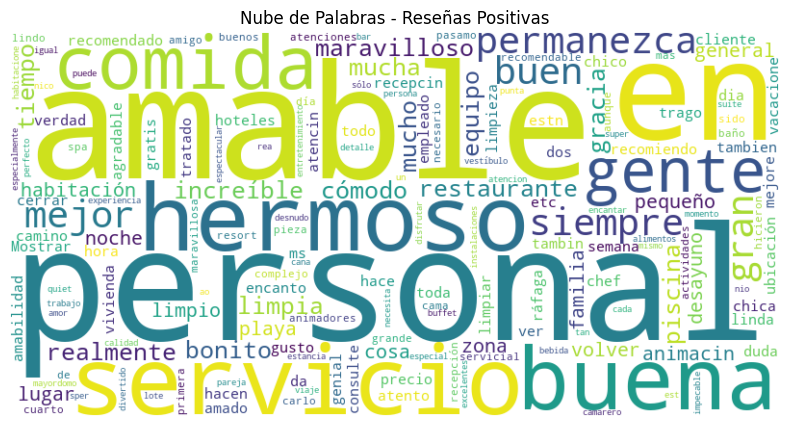

palabras: bit gente poner primero mejor permanezca en siempre coste servicio aparcamiento carga habitación pequeña beber ascensor recepción gran ubicación espere algo nunca dormitorio permanezca en baño llamado piense en roto londres suelo precio ver camino otro mira piscina aseo sucio consulte reservado restaurante aunque pobre horrible ayuda Tengo mañana cualquier cosa problema ms tiempo realmente disponible véase vivienda diga servicio cómodo hoteles da person personal lento cerrar incluso dejar oler bonito utilice pequeño limpiar todo fuerte piscina trabajando antiguo fieltro teléfono calidad tv etc encontrar miró comida no recepción duro ruidoso encontrado pagado alguien cuarto de baño noche servicio de habitaciones no era decepcionado ruido en general día usado aunque extra abra noche porque cama almohada minuto toma izquierda dormir por necesario tabla experiencia dio gran lugar restaurante mucho espacio carpet dos sin reserva haba alta habitación lejos llegó grosero buffet ok c

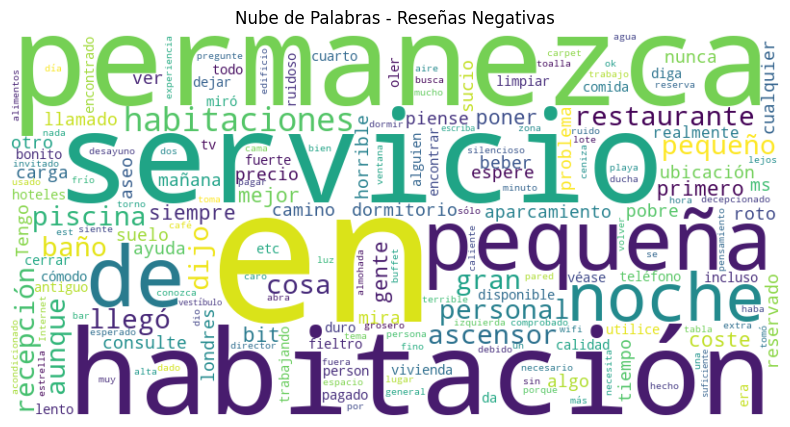

In [95]:
palabras_positivas = list(palabras_traducidas_positivas.values())
palabras_negativas = list(palabras_traducidas_negativas.values())

# Crear una nube de palabras para las reseñas palabras_traducidas_positivas
def crear_nube_palabras(textos, titulo):
    texto_completo = " ".join(textos)
    print("palabras:", texto_completo)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

crear_nube_palabras(palabras_positivas, 'Nube de Palabras - Reseñas Positivas')
crear_nube_palabras(palabras_negativas, 'Nube de Palabras - Reseñas Negativas')
# Guardar el DataFrame final


## Fraccionar las reviews
En esta sección, dividiremos todas las reviews en 5 bloques: uno con preferencia por sentimientos positivos, otro por negativos y los tres restantes contendrán opiniones variadas. Esto permitirá analizar el comportamiento y las características de cada grupo de reseñas según su polaridad y diversidad.


In [75]:
import pandas as pd

# Limpieza de sentiment
df_reviews['sentiment'] = df_reviews['sentiment'].str.strip().str.lower()

# Filtrar positivas y negativas
reviews_positivas = df_reviews[df_reviews['sentiment'] == 'positive'].sample(frac=1, random_state=42).reset_index(drop=True)
reviews_negativas = df_reviews[df_reviews['sentiment'] == 'negative'].sample(frac=1, random_state=42).reset_index(drop=True)


n_pos = len(reviews_positivas)
n_neg = len(reviews_negativas)

# Negativas
neg_half = n_neg // 2
neg_rest = n_neg - neg_half  # el resto que se repartirá en otros bloques

# Positivas
pos_half = n_pos // 2
pos_rest = n_pos - pos_half  # resto para repartir

# --- BLOQUE 2: 50% negativas (directo) + parte de positivas repartidas ---
bloque_2_neg = reviews_negativas.iloc[:neg_half]
# Positivas que van aquí: una tercera parte del resto de positivas (arbitrario, para repartir en 3 bloques)
pos_a_b2 = reviews_positivas.iloc[:pos_rest // 3]

bloque_2 = pd.concat([bloque_2_neg, pos_a_b2]).sample(frac=1, random_state=2).reset_index(drop=True)

# --- BLOQUE 1: 50% positivas (directo) + parte de negativas repartidas ---
bloque_1_pos = reviews_positivas.iloc[:pos_half]
# Negativas que van aquí: una tercera parte del resto de negativas
neg_a_b1 = reviews_negativas.iloc[neg_half:neg_half + neg_rest // 3]

bloque_1 = pd.concat([bloque_1_pos, neg_a_b1]).sample(frac=1, random_state=1).reset_index(drop=True)

# --- RESTO para random_1 y random_2 ---

# Positivas que quedan para random_1 y random_2
pos_restantes = reviews_positivas.iloc[pos_rest // 3:]
# Negativas que quedan para random_1 y random_2
neg_restantes = reviews_negativas.iloc[neg_half + neg_rest // 3:]

resto = pd.concat([pos_restantes, neg_restantes]).sample(frac=1, random_state=3).reset_index(drop=True)

# Dividir resto en dos para random_1 y random_2
n_resto = len(resto) // 2
bloque_3 = resto.iloc[:n_resto].reset_index(drop=True)
bloque_4 = resto.iloc[n_resto:].reset_index(drop=True)

# Diccionario final con bloques
bloques_reviews = {
    '80p_positivas': bloque_1,
    '80p_negativas': bloque_2,
    'random_1': bloque_3,
    'random_2': bloque_4,
}

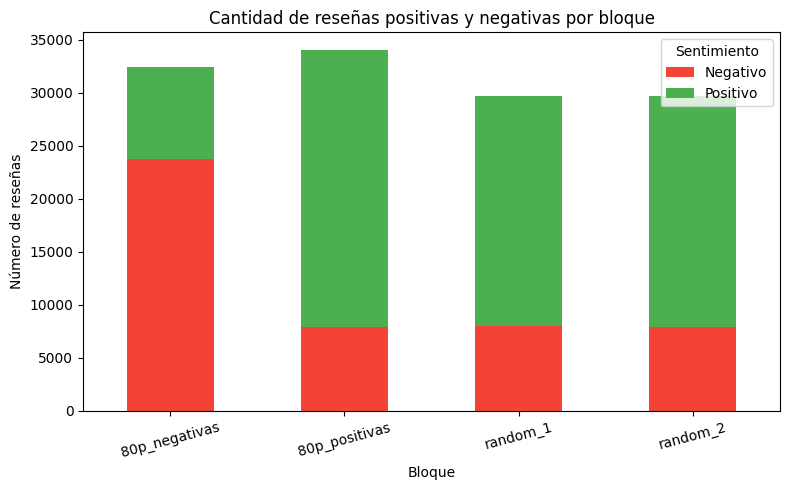

In [76]:
import matplotlib.pyplot as plt

# Crear DataFrame resumen con conteos por bloque y sentimiento
data = []

for nombre, df in bloques_reviews.items():
    pos_count = (df['sentiment'] == 'positive').sum()
    neg_count = (df['sentiment'] == 'negative').sum()
    data.append({'Bloque': nombre, 'Sentimiento': 'Positivo', 'Cantidad': pos_count})
    data.append({'Bloque': nombre, 'Sentimiento': 'Negativo', 'Cantidad': neg_count})

df_summary = pd.DataFrame(data)

# Pivotar para gráfico apilado
pivot_df = df_summary.pivot(index='Bloque', columns='Sentimiento', values='Cantidad').fillna(0)

# Graficar barras apiladas
pivot_df.plot(kind='bar', stacked=True, figsize=(8,5), color=['#F44336', '#4CAF50'])

plt.title('Cantidad de reseñas positivas y negativas por bloque')
plt.xlabel('Bloque')
plt.ylabel('Número de reseñas')
plt.xticks(rotation=15)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()


# HOTEL: Eurostar Hotel de la Reconquista





In [77]:
# Unir los DataFrames de Hotel y Reviews segun la cantidad de reseñas que tiene cada hotel

# Reseñas del Hotel: Parador de Cadiz
df_hotel_cadiz = df_hotel[df_hotel['hotel'].str.lower() == 'eurostars hotel de la reconquista']
total_booking = len(df_hotel_cadiz)

# Del total de reservas, coger la misma cantidad de reseñas, donde el 80% sean positivas y el 20% negativas, todas sacadas de df_reviews
df_reviews_positive = df_reviews[df_reviews['sentiment'] == 'positive']
df_reviews_negative = df_reviews[df_reviews['sentiment'] == 'negative']

total_positive = int(total_booking * 0.2)
total_negative = total_booking - total_positive
df_reviews_positive = df_reviews_positive.sample(n=total_positive, random_state=42)
df_reviews_negative = df_reviews_negative.sample(n=total_negative, random_state=42)

# Unir los DataFrames de Reviews
df_reviews_cadiz = pd.concat([df_reviews_positive, df_reviews_negative], ignore_index=True)

df_final_asturias = pd.concat([df_hotel_cadiz.reset_index(drop=True), df_reviews_cadiz.reset_index(drop=True)], axis=1)
df_final_asturias.head()


,hotel,cancelado,régimen,canal_distribución,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,niños,hombres,...,nacionalidad_húesped,público_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,días_reserva,plazas_aparcamiento,ubicación,text,sentiment
0,eurostars hotel de la reconquista,0,bb,ta/to,otras,0,0,1,0,1,...,gbr,online ta,2020-02-08,2020-02-08,2020-02-13,5,0,asturias,my wife and i are festival food vendors in the...,positive
1,eurostars hotel de la reconquista,0,bb,ta/to,tercera edad,0,0,2,0,1,...,prt,online ta,2020-02-17,2020-02-17,2020-02-24,7,1,asturias,a nice clean hotel close to the highway the pl...,positive
2,eurostars hotel de la reconquista,1,bb,ta/to,pareja,0,0,3,0,2,...,prt,online ta,2019-05-17,2019-05-17,2019-05-21,4,0,asturias,muy buena atencion gracias,positive
3,eurostars hotel de la reconquista,0,hb,ta/to,pareja,0,0,2,0,1,...,irl,online ta,2021-03-31,2021-03-31,2021-04-07,7,0,asturias,nice and clean would not hesitate to book agai...,positive
4,eurostars hotel de la reconquista,0,bb,ta/to,pareja,0,0,2,0,1,...,irl,offline ta/to,2022-06-23,2022-06-23,2022-07-04,11,0,asturias,todo bien,positive


C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_21160\3621470625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_asturias, x='sentiment', palette='Set2')


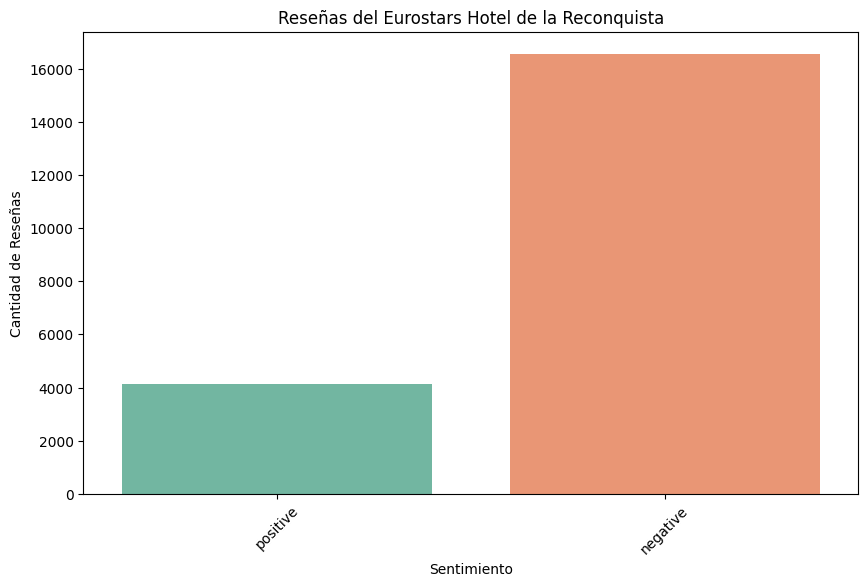

In [78]:
# Gráfica para ver las reseñas positivas y negativas de df_hotel_cadiz
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final_asturias, x='sentiment', palette='Set2')
plt.title('Reseñas del Eurostars Hotel de la Reconquista')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)
plt.show()

In [79]:

# Limpiar textos sin traducir aún y separar por sentimiento
textos_limpios_positivos = df_final_asturias[df_final_asturias['sentiment'] == 'positive']['text'].apply(remove_stopwords)
textos_limpios_negativos = df_final_asturias[df_final_asturias['sentiment'] == 'negative']['text'].apply(remove_stopwords)

# Sacar las palabras de las nubes de palabras
wordcloud_positiva = WordCloud().generate(" ".join(textos_limpios_positivos))
wordcloud_negativa = WordCloud().generate(" ".join(textos_limpios_negativos))
palabras_nube_positivas = set(wordcloud_positiva.words_.keys())
palabras_nube_negativas = set(wordcloud_negativa.words_.keys())
print(f'Palabras únicas en nube positiva: {len(palabras_nube_positivas)}')
print(f'Palabras únicas en nube negativa: {len(palabras_nube_negativas)}')

# Traducir palabras únicas
palabras_traducidas_positivas = traducir_palabras_unicas(palabras_nube_positivas, 'es')
palabras_traducidas_negativas = traducir_palabras_unicas(palabras_nube_negativas, 'es')

print(f'Palabras traducidas en nube positiva: {palabras_traducidas_positivas}')
print(f'Palabras traducidas en nube negativa: {palabras_traducidas_negativas}')


Palabras únicas en nube positiva: 200
Palabras únicas en nube negativa: 200
Palabras traducidas en nube positiva: {'people': 'gente', 'dos': 'dos', 'recepcin': 'recepcin', 'tambin': 'tambin', 'recomendado': 'recomendado', 'personal amable': 'personal amable', 'stayed': 'permanezca en', 'atencin': 'atencin', 'always': 'siempre', 'hace': 'hace', 'tambien': 'tambien', 'servicio': 'servicio', 'recomiendo': 'recomiendo', 'chef': 'chef', 'gente': 'gente', 'hermosa': 'hermoso', 'best': 'mejor', 'buen': 'buen', 'buena comida': 'buena comida', 'atento': 'atento', 'trago': 'trago', 'hermoso': 'hermoso', 'encanto': 'encanto', 'great': 'gran', 'location': 'ubicación', 'verdad': 'verdad', 'agradable': 'agradable', 'duda': 'duda', 'price': 'precio', 'hora': 'hora', 'view': 'ver', 'way': 'camino', 'limpieza': 'limpieza', 'wonderful': 'maravilloso', 'hoteles': 'hoteles', 'piscina': 'piscina', 'amazing': 'increíble', 'chico': 'chico', 'restaurante': 'restaurante', 'check': 'consulte', 'limpia': 'limpia

palabras: gente dos recepcin tambin recomendado personal amable permanezca atencin siempre hace tambien  recomiendo chef gente hermoso mejor  comida atento trago hermoso encanto gran ubicación verdad agradable duda precio hora ver camino limpieza maravilloso hoteles piscina increíble chico restaurante consulte limpia bonito amado dia ráfaga ms cliente tiempo realmente linda  vivienda empleado mejore gracia gusto  semana chica cómodo tratado da personal equipo mucha cerrar toda bonito amabilidad limpiar Mostrar pequeño  hacen estn piscina comida  genial gratis vacacione etc equipo animacin complejo comida recepción atenciones aunque cuarto baño noche pieza recomendable general mas primera maravillosa general día siempre limpio cómodo limpio buenos amigo  grande animadores noche amable servicial cama lindo increíble pasamo carlo actividades resort cosa necesario sido volver spa lugar hicieron restaurante experiencia bebida quiet camarero desayuno mayordomo gran trabajo mejor estancia hab

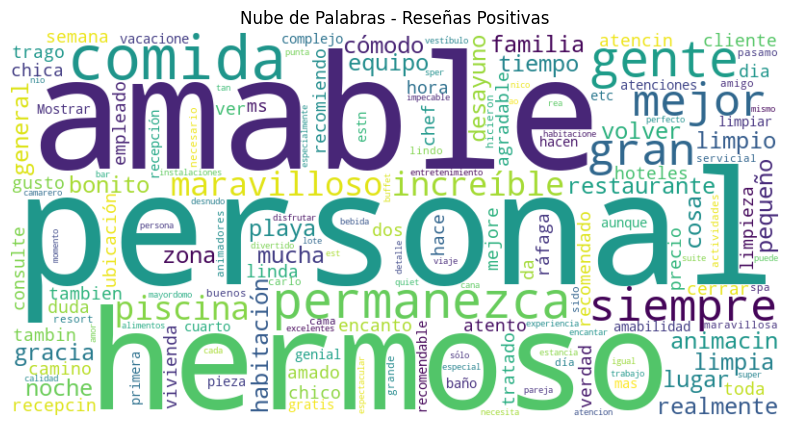

palabras: bit gente poner primero mejor permanezca siempre coste  aparcamiento carga habitación pequeña beber ascensor recepción gran ubicación espere  nunca dormitorio permanezca baño llamado piense roto londres suelo precio ver camino  mira piscina aseo sucio consulte reservado restaurante aunque pobre horrible ayuda  mañana cualquier cosa problema ms tiempo realmente disponible véase vivienda diga  cómodo hoteles da person personal lento cerrar incluso dejar oler bonito utilice pequeño limpiar  fuerte piscina trabajando antiguo fieltro teléfono calidad tv etc encontrar miró comida  recepción duro ruidoso encontrado pagado alguien cuarto baño noche habitaciones  decepcionado ruido general día usado aunque extra abra noche  cama almohada minuto toma izquierda dormir  necesario tabla experiencia dio gran lugar restaurante  espacio carpet dos  reserva haba alta habitación lejos llegó grosero buffet ok comprobado  sólo debido permanezca ascensor zona ceniza est desayuno conozca silencios

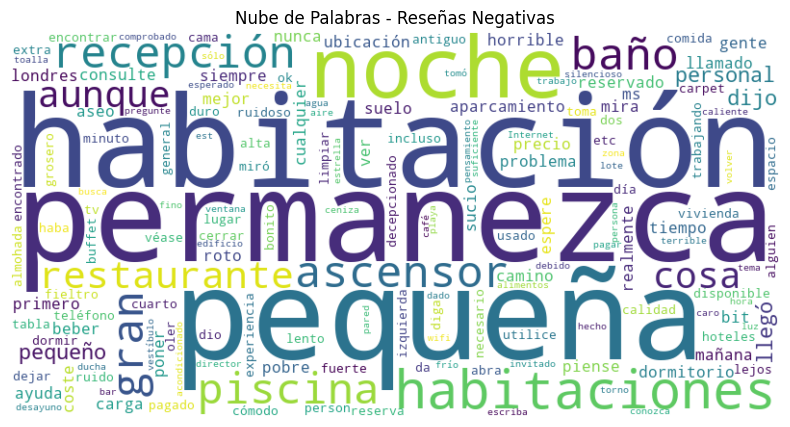

In [98]:
palabras_positivas = list(palabras_traducidas_positivas.values())
palabras_negativas = list(palabras_traducidas_negativas.values())

# Crear una nube de palabras para las reseñas palabras_traducidas_positivas
def crear_nube_palabras(textos, titulo):
    texto_completo = " ".join(textos)
    print("palabras:", texto_completo)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

# Las palabras ya están filtradas y traducidas, solo hay que unirlas en un string
palabras_positivas_filtradas = [remove_stopwords(p) for p in palabras_positivas]
palabras_negativas_filtradas = [remove_stopwords(p) for p in palabras_negativas]

crear_nube_palabras(palabras_positivas_filtradas, 'Nube de Palabras - Reseñas Positivas')
crear_nube_palabras(palabras_negativas_filtradas, 'Nube de Palabras - Reseñas Negativas')